# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [27]:
import numpy as np
import keras
from keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard
import os

In [28]:
# Crear una carpeta para los logs de TensorBoard
log_dir = "logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Crear el callback de TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


## Prepare the data

In [29]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [30]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [31]:
batch_size = 128
epochs = 15

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "Precision", "Recall"]
)

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Entrenando el modelo con el callback de TensorBoard
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[tensorboard_callback]  # Añadir el callback de TensorBoard
)



Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - Precision: 0.8873 - Recall: 0.6412 - accuracy: 0.7694 - loss: 0.7584 - val_Precision: 0.9834 - val_Recall: 0.9745 - val_accuracy: 0.9788 - val_loss: 0.0821
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.9705 - Recall: 0.9595 - accuracy: 0.9645 - loss: 0.1182 - val_Precision: 0.9890 - val_Recall: 0.9847 - val_accuracy: 0.9865 - val_loss: 0.0539
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.9770 - Recall: 0.9690 - accuracy: 0.9726 - loss: 0.0872 - val_Precision: 0.9883 - val_Recall: 0.9858 - val_accuracy: 0.9873 - val_loss: 0.0492
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.9806 - Recall: 0.9757 - accuracy: 0.9780 - loss: 0.0702 - val_Precision: 0.9905 - val_Recall: 0.9875 - val_accuracy: 0.9890 - val_loss: 0.0418
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.9833 - Recall: 0.9788 - accuracy: 0.9808 - loss: 0.0630 - val_Precision: 0.9903 - val_Recall

## Evaluate the trained model

Test loss: 0.023087063804268837
Test accuracy: 0.9926000237464905
Test precision: 0.9932892918586731
Test recall: 0.9916999936103821
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    2 1021    0    1    0    0    5    2    0]
 [   0    0    1 1005    0    2    0    1    1    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0    5    0  883    1    0    1    1]
 [   2    2    1    0    1    2  949    0    1    0]
 [   0    3    3    0    0    1    0 1020    1    0]
 [   2    1    2    1    0    1    0    1  964    2]
 [   0    0    0    0    9    3    0    3    1  993]]


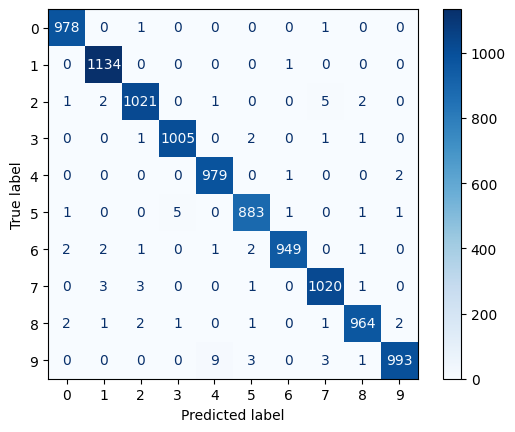

In [32]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test precision:", score[2])
print("Test recall:", score[3])

# Generate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)          # Convert one-hot to class labels

cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap="Blues")
plt.show()


In [ ]:
# Crear el callback de EarlyStopping (detención temprana)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Se puede usar 'val_accuracy' si prefieres monitorear la precisión
    patience=3,          # Número de épocas sin mejora para detener el entrenamiento
    restore_best_weights=True,  # Restablece los mejores pesos cuando se detiene el entrenamiento
)

# Crear el callback para guardar el mejor modelo durante el entrenamiento
model_checkpoint = ModelCheckpoint(
    'best_model.keras',        # Changed the file extension to .keras
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Agregar ambos callbacks al entrenar el modelo
callbacks = [early_stopping, model_checkpoint]

# Entrenamiento del modelo con los callbacks
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=callbacks  # Aquí se pasan los callbacks
)

!tensorboard --logdir=logs

Epoch 1/15
407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.9948 - Recall: 0.9942 - accuracy: 0.9945 - loss: 0.0157
Epoch 1: val_loss improved from inf to 0.03406, saving model to best_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.9948 - Recall: 0.9942 - accuracy: 0.9945 - loss: 0.0157 - val_Precision: 0.9933 - val_Recall: 0.9927 - val_accuracy: 0.9927 - val_loss: 0.0341
Epoch 2/15
408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.9957 - Recall: 0.9953 - accuracy: 0.9954 - loss: 0.0137
Epoch 2: val_loss improved from 0.03406 to 0.02892, saving model to best_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.9956 - Recall: 0.9952 - accuracy: 0.9954 - loss: 0.0137 - val_Precision: 0.9935 - val_Recall: 0.9927 - val_accuracy: 0.9928 - val_loss: 0.0289
Epoch 3/15
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.9954 - Recall: 0.9949 - accuracy: 0.9951 - loss: 0.0144
Epoch 3: val_loss did not improve from 0.02892
422/422 ━━━━━━━━━━━━

In [34]:
from keras.callbacks import ModelCheckpoint

# Guardar el mejor modelo basado en la validación
checkpoint_callback = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',  # Puedes cambiarlo a cualquier métrica que desees
    save_best_only=True,
    mode='min',  # Guarda solo si la pérdida de validación es menor
    verbose=1
)

# Entrenamiento con ambos callbacks
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[tensorboard_callback, checkpoint_callback]  # Añadir ambos callbacks
)


Epoch 1/15
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.9938 - Recall: 0.9931 - accuracy: 0.9935 - loss: 0.0187
Epoch 1: val_loss improved from inf to 0.03223, saving model to best_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Precision: 0.9938 - Recall: 0.9931 - accuracy: 0.9935 - loss: 0.0187 - val_Precision: 0.9922 - val_Recall: 0.9907 - val_accuracy: 0.9915 - val_loss: 0.0322
Epoch 2/15
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.9935 - Recall: 0.9927 - accuracy: 0.9930 - loss: 0.0197
Epoch 2: val_loss improved from 0.03223 to 0.02895, saving model to best_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - Precision: 0.9935 - Recall: 0.9927 - accuracy: 0.9930 - loss: 0.0197 - val_Precision: 0.9935 - val_Recall: 0.9925 - val_accuracy: 0.9928 - val_loss: 0.0290
Epoch 3/15
414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.9944 - Recall: 0.9939 - accuracy: 0.9940 - loss: 0.0169
Epoch 3: val_loss improved from 0.02895 to 0.02850, saving model to